In [7]:
import os
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
matplotlib.rcParams.update({'font.size': 14})

import pandas as pd

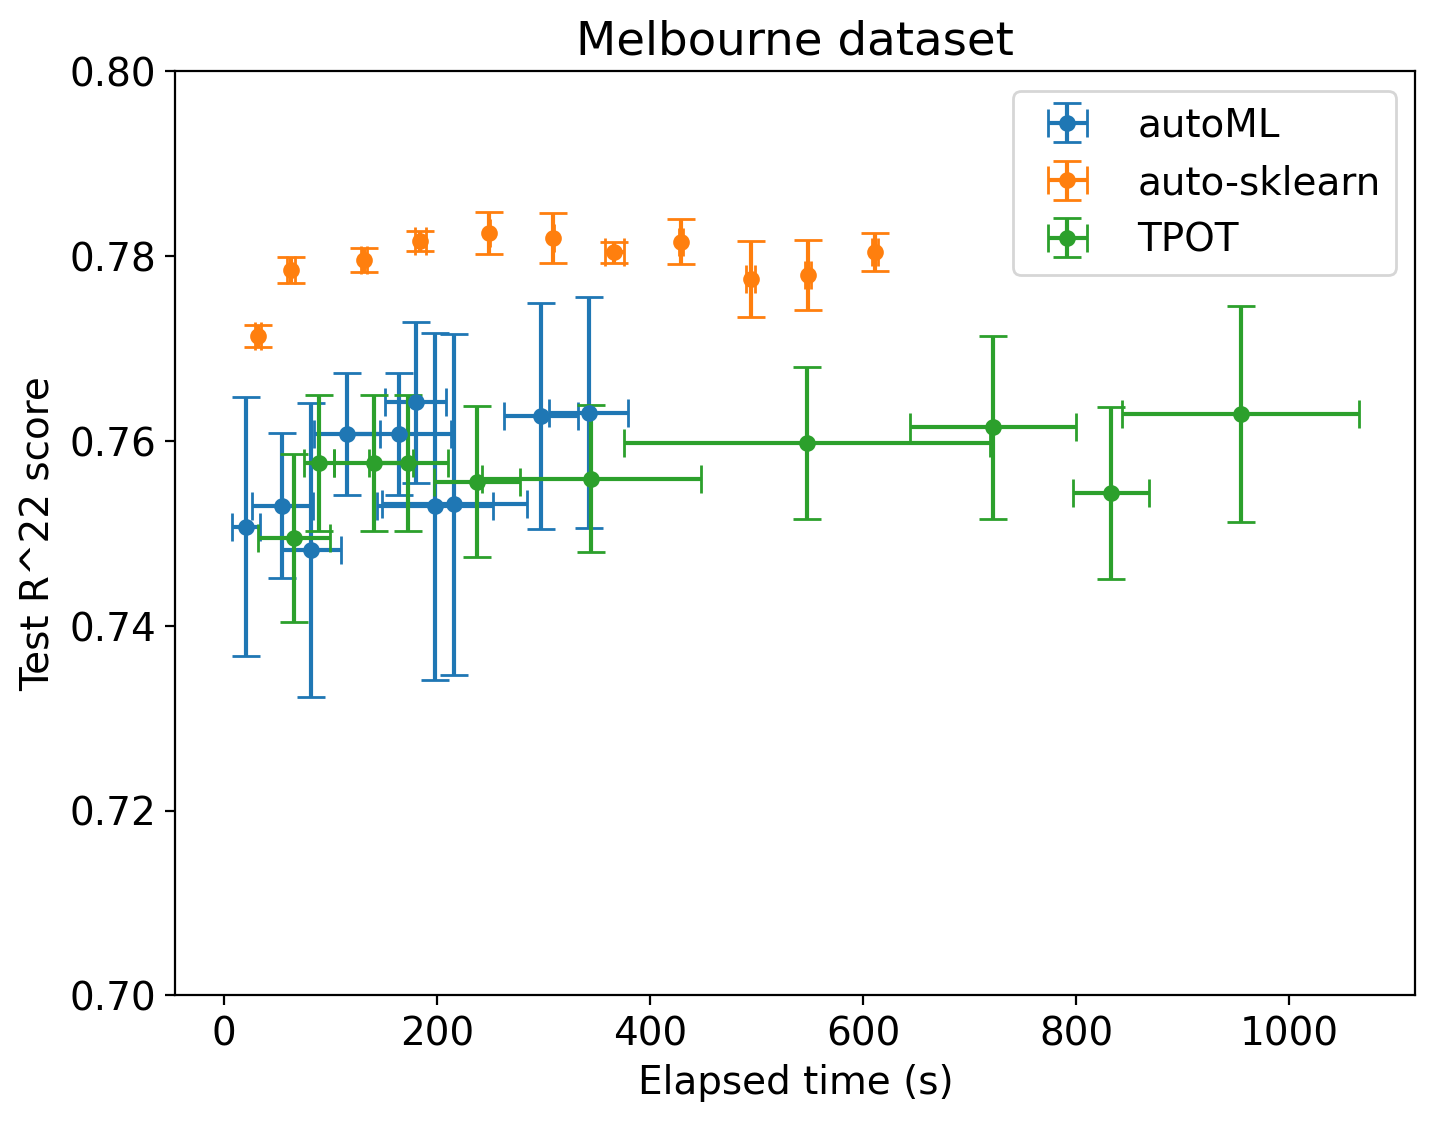

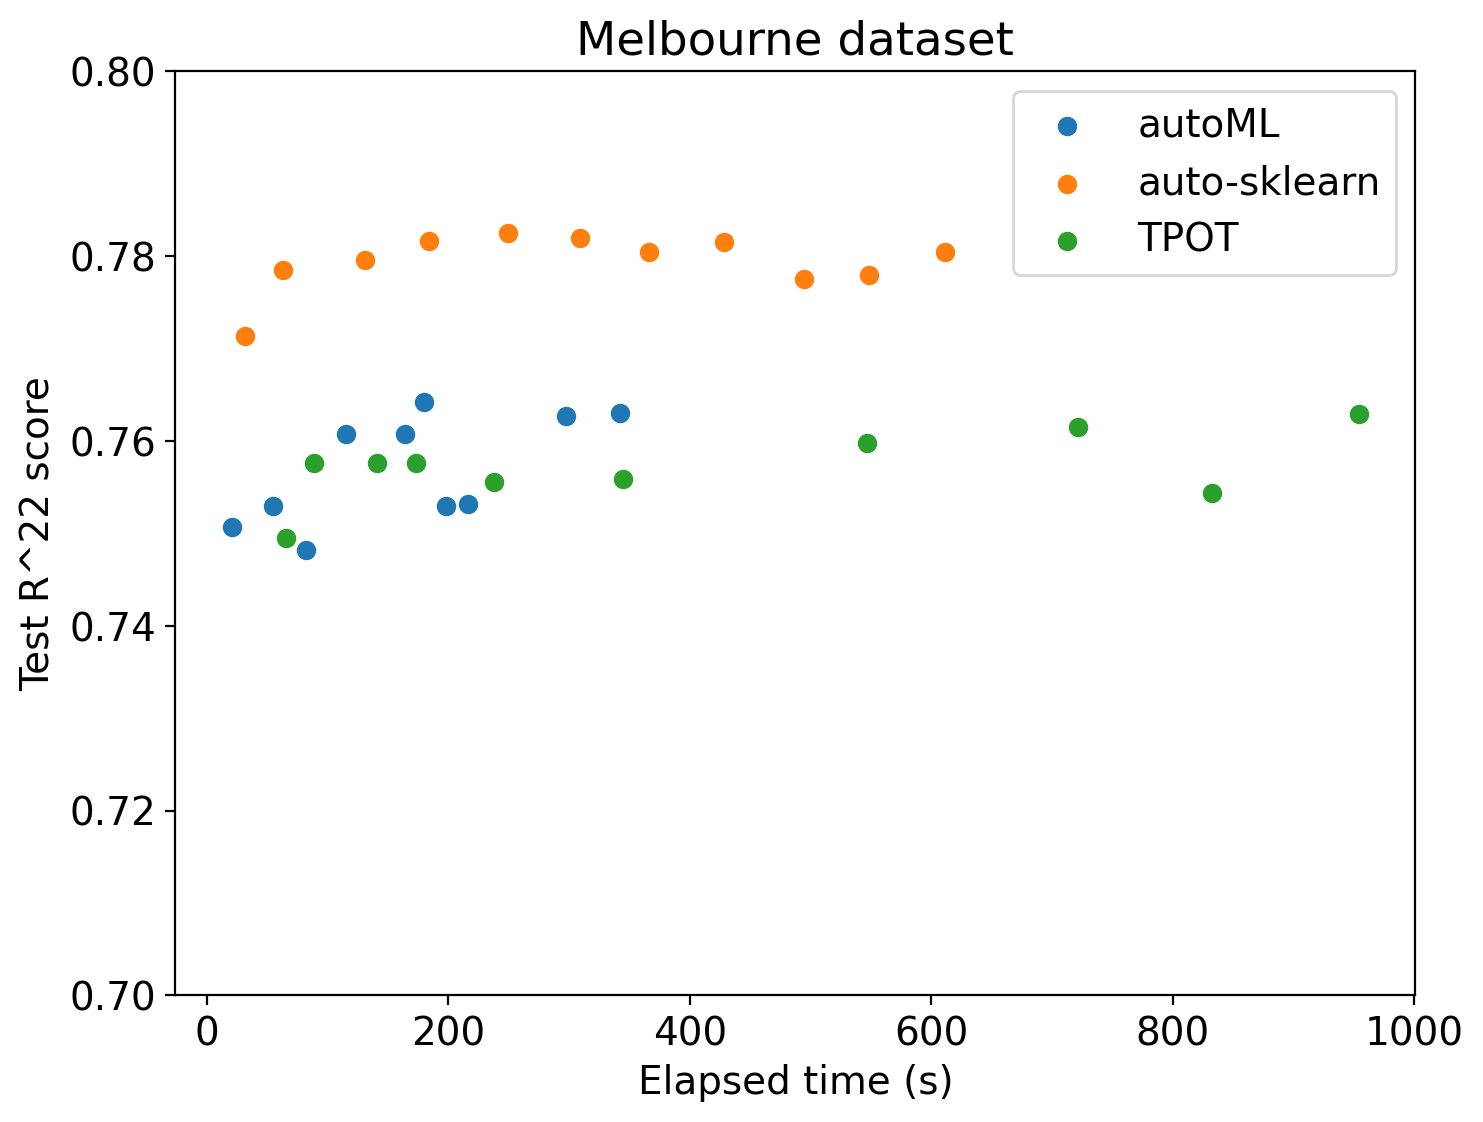

In [84]:
file_names = ['autoML.csv', 'auto-sklearn.csv', 'TPOT.csv']
dir_path = '../result'
start_index = 2

[fig1, ax1] = plt.subplots(1, 1, figsize = (8, 6))
[fig2, ax2] = plt.subplots(1, 1, figsize = (8, 6))

axes = [ax1, ax2]

for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    label = os.path.splitext(os.path.basename(file_path))[0]

    df = pd.read_csv(file_path)
    df = df.loc[start_index:]
    df = df.apply(lambda col: pd.to_numeric(col)) # typecast (str -> float)
    
    elapsed_time = df['elapsed_time']
    elapsed_time_std = df['elapsed_time.1']
    test_R2 = df['test_R2']
    test_R2_std = df['test_R2.1']

    ax1.errorbar(elapsed_time, test_R2, xerr=elapsed_time_std, yerr=test_R2_std,
                 fmt='o', capsize=5, capthick=1, markersize=5, label=label)
    ax2.scatter(elapsed_time, test_R2, label=label)

for ax in axes:
    ax.set_xlabel("Elapsed time (s)")
    ax.set_ylabel("Test R2 score")
    ax.set_ylim([0.7, 0.8])
    ax.set_title("Melbourne dataset")
    ax.legend()


/tmp/ipykernel_2541999/1345791062.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


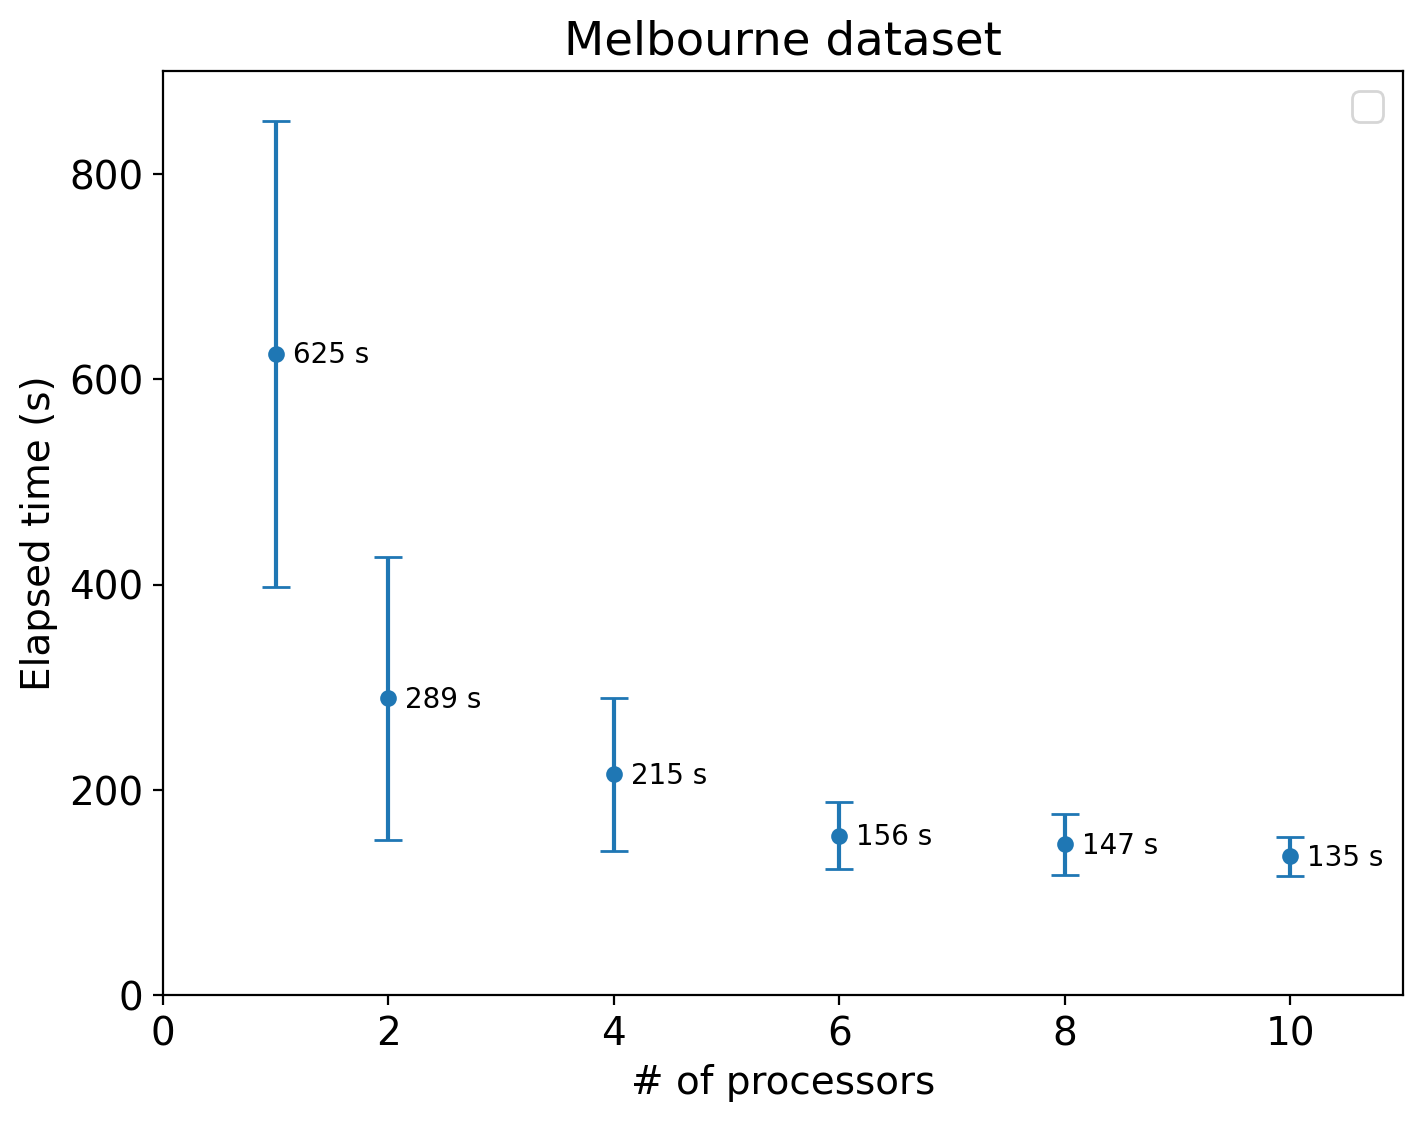

In [83]:
file_names = ['autoML_njobs.csv']
dir_path = '../result'
start_index = 3

[fig1, ax1] = plt.subplots(1, 1, figsize = (8, 6))
axes = [ax1]

for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    label = os.path.splitext(os.path.basename(file_path))[0]

    df = pd.read_csv(file_path)
    df = df.loc[start_index:]
    df = df.apply(lambda col: pd.to_numeric(col)) # typecast (str -> float)
    
    n_jobs = df['Unnamed: 0']
    elapsed_time = df['elapsed_time']
    elapsed_time_std = df['elapsed_time.1']
    

    ax1.errorbar(n_jobs, y=elapsed_time, yerr=elapsed_time_std,
                 fmt='o', capsize=5, capthick=1, markersize=5)
    
    for xi, yi in zip(n_jobs, elapsed_time):
        plt.text(xi + 0.15, yi - 15, f'{yi:.0f} s', fontsize=10, color='black', va='bottom', ha='left')


for ax in axes:
    ax.set_xlabel("# of processors")
    ax.set_ylabel("Elapsed time (s)")
    ax.set_title("Melbourne dataset")
    ax.legend()
    
    ax.set_xlim([0, 11])
    ax.set_ylim([0, 900])
    ax.set_yticks(range(0, 1000, 200))
